In [33]:
import cv2
import os
import glob
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure



In [2]:
ena_local = 'C:/temp/ena/images/train100/'

In [4]:
images = [os.path.split(i)[1] for i in glob.glob(ena_local + '/*.jpg', recursive=True)]

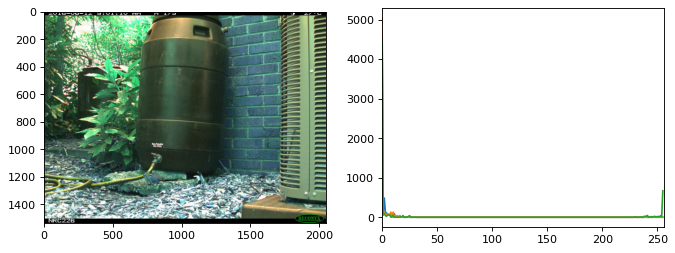

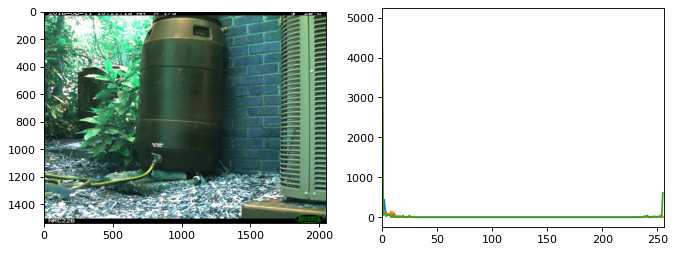

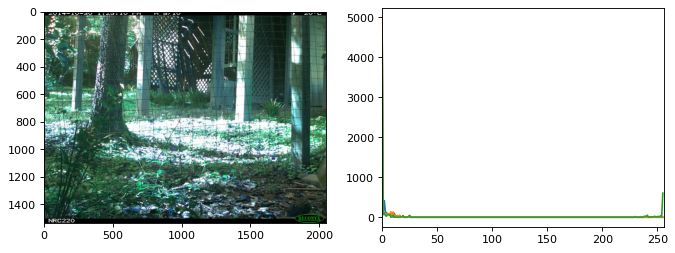

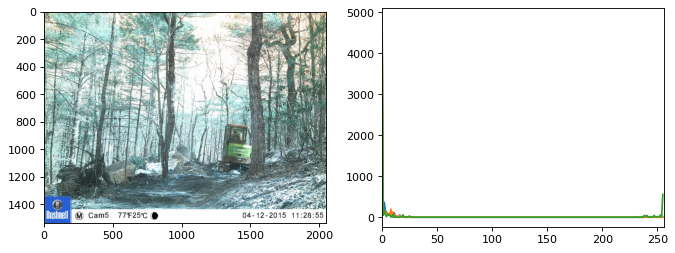

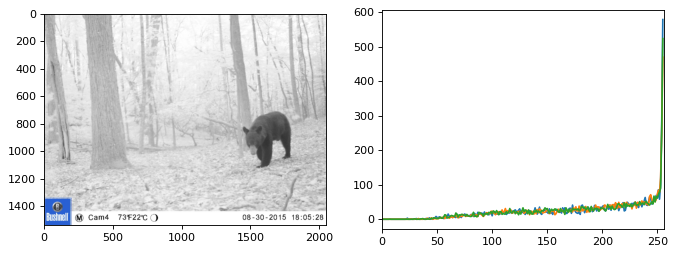

In [40]:
for i in (1,5,100,1213,5432):
    imx = images[i]
    hist1 = cv2.calcHist(img, [0], None, [256], [0,256])
    hist2 = cv2.calcHist(img, [1], None, [256], [0,256])
    hist3 = cv2.calcHist(img, [2], None, [256], [0,256])
    img = cv2.imread(ena_local + imx)
    figure(figsize=(10, 8), dpi=80)
    plt.subplot(221), plt.imshow(img)
    plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
    plt.xlim([0,256])
    plt.show()